# 날씨 빅데이터콘테스트 EDA-weather-data
[날씨 빅데이터 콘테스트]https://bd.kma.go.kr/contest/sub_04.do <br>
[날씨마루] https://bd.kma.go.kr/kma2019/dta/reqst/KBP51001.do?pageNum=5&menuCd=F040201020 <br>
[구글드라이브-데이터]https://drive.google.com/drive/folders/1RO_tBYRFGi-nXWX1Ujb4c8h6gebuCAfp <br>
[기상자료 개방포털] https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1 <br>

### 분석 주제
공장 내 철강 제품의 결로 발생 예측 모형 개발
* 24, 48시간 후 결로 발생 예측 및 예측경보 시스템 운영방안 제시

### 분석 데이터
> 1. 기상데이터
    * 날씨마루, 기상자료개방 포털
> 2. 현대제철 공장 (당진1공장, 당진2공장)
    * 결로발생여부 : 내/외부 기온, 습도, 코일온도 
        * 1: 발생, 0:미발생
    * 데이터 기간 : 2016.4.1 ~ 2020.3.31

### 정확도 검증
* 2019.4.1 ~ 2020.3.31 중 특정시점 기준 24,48시간 후 결로발생 여부 (0,1)

### 분석 방향
1) 과거 기상 데이터로 24시간, 48시간 후의 기상 데이터 예측 - 시계열 문제 <br>
2) 1에서 예측한 기상 데이터로 공장의 기상 상황 예측 - 회귀 <br>
3) 2에서 예측한 공장 기상 데이터로 결로 여부 예측 - 분류 <br>

1. feature : 과거 기상 데이터, target : 24시간, 48시간 뒤의 미래 기상 데이터
2. feature : 1에서 예측한 미래 기상 데이터, target : 공장의 미래 기상 데이터
3. feature: 2에서 예측한 공장의 미래 기상 데이터, target : 미래의 결로 여부

### 테이블 설명
> * plant1_train
    * 공장1의 결로발생 데이터(학습용)
    * 기간 : 2016-04-01 0:00 ~ 2019-03-31 23:50
> * plant2_train
    * 공장2의 결로발생 데이터(학습용)
    * 기간 : 2016-04-01 0:00 ~ 2019-03-31 23:50
> * plant_test
    * 검증용 데이터
    * 2019-04-01 0:00 ~ 2020-03-31 23:50
    * 예측 정확도 검증을 위한 결로발생 여부  비공개

### 날씨데이터 
(참고) 2공장은 당진AWS, 1공장은 신평AWS과 가까움. 서산ASOS는 두공장과 조금 멈<br>

* 당진 = 기온, 습도, 상대습도, 강수, 지면온도
* 신평 = 기온, 습도, 상대습도, 강수, 지면온도
* 서산 = 기온, 습도, 강수, 이슬점온도, 지면온도

### 진행방안
* 공장1,2(plant1 , plant2) 별로, 그리고 공장위치 (loc) 별로 다르다고 할 수 있는지 통계적 검정
    * 공장위치별로 다르게 모델링 한 근거를 댈 때 통계적 검정이 필요.
* RETAIN 모델
    * 시계열분석에 적합한 모델. RNN기반, 해석력 좋음.
    * RETAIN모델을 통해 추세의 유사성 뿐만 아니라, 기온/습도/이슬점이 실제 결로에 미치는 영향력의 크기를 시점별로 확인 가능.
* 결로현상 같은 비율상 적게 나타나는 값을 예측하기에 좋은 모델? 방안? 구상하는게 중요해보임.
* 변수별 영향력 시각화
* 다중공선성 문제 고려
    * 공장 내부온도랑 코일표면온도와 같이 상관관계 높은 변수들 중 어떤변수 뽑아낼지

#### 참고
* 특정 년도에 결로가 많으면, 해당 년도에 생산을 많이해서 그만큼 결로가 많이 발생한건아닐지
* 실행방안 : 결로예측을 함에 따라서 어떤 조치를 취하는게 좋을지를 말해줄수있을까
    * 진동수, 등등의 추가 변수들을 사용
    
#### study기록  (2020-05-30)
* parallel cordinates plot 그려보기
* 외부습도 - 내부습도 차이에 따른 결로 시각화
* 공장 내부 온도,습도와 코일표면온도를 예측하는게 main
* asos 데이터랑 aws데이터 중에 asos가 null값이 적은데, aws가 공장과 더 가까워서 어떤데이터를 사용할지 고민
* 공장 내부온도,습도와 공장 외부온도,습도와 코일표면 온도 를 그려보고 
    * 외부온도에 내부가 영향을 많이 받는다고 보여지면, 내부 온도를좀더 관리할 수 있는 방안을 주는것도 
* null값은 선형보간법으로 
* train데이터를 30분단위로 날짜 추가해서 선형보간으로 값 채움.
* rolling해서 발생한 Nan값 처리방법
* 과거 3년데이터로 1년치를 예측하는게 과연 옳을지
    * 예측값을 계속 포함해서 모델을 만들어야하진 않을지 
* 코일 포면온도에 따른 습도를 산점도로 확인
    * 이상치 제거 전/후 비교

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from itertools import cycle
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
# jupyter notebook cell 너비 조절
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 한글깨짐 문제
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

#### 데이터 불러오기


In [4]:
plant1_train=pd.read_csv('./data/plant1_train.csv',index_col=[0],parse_dates=['plant1_train.mea_ddhr'])
plant2_train=pd.read_csv('./data/plant2_train.csv',index_col=[0],parse_dates=['plant2_train.mea_ddhr'])
plant_test=pd.read_csv('./data/plant_test.csv',index_col=[0],parse_dates=['plant_test.mea_ddhr'])

# 당진
dangjin_humid=pd.read_csv('./data/dangjin_humid.csv',index_col=None)
dangjin_rain=pd.read_csv('./data/dangjin_rain.csv',index_col=None)
dangjin_tem=pd.read_csv('./data/dangjin_tem.csv',index_col=None)

# 신평
shinpyung_humid=pd.read_csv('./data/shinpyung_humid.csv',index_col=None)
shinpyung_rain=pd.read_csv('./data/shinpyung_rain.csv',index_col=None)
shinpyung_tem=pd.read_csv('./data/shinpyung_tem.csv',index_col=None)

# 서산
seosan=pd.read_csv('./data/asos_서산_시간별.csv',index_col=None,parse_dates=['일시'])

# test데이터셋과 동일하게 train 데이터 전처리
plant_train=pd.read_csv('./data/plant_train.csv',index_col=[0])

#### 컬럼명 전처리

In [5]:
# 날씨 컬럼명 정리
dangjin = [dangjin_tem, dangjin_rain, dangjin_humid]
seosan=[seosan]

for d in dangjin:
    d.columns = [col.split('.')[1] for col in d.columns]    
    d.rename(columns={'tm':'datetime'}, inplace=True)    

In [6]:
# 공장 컬럼명 정리
plant = [plant1_train, plant2_train, plant_test]

for p in plant:
    p.columns = [col.split('.')[1] for col in p.columns]    
    p.rename(columns={'mea_ddhr':'datetime'}, inplace=True)    

In [ ]:
# # 다른 방법 
# dangjin = [dangjin_tem, dangjin_rain, dangjin_humid]
# i = 0
# col_n =[]
# for d in dangjin:
#     col_n.append([])
#     for col in d.columns:
#         col_n[i].append( col.split('.')[1] )

#     print(col_n[i])
#     i += 1

### 시간별 데이터분리
**[plant1]** 
* 년도별로 봤을 때, 결로수가 2018년이 loc1,loc2,loc3 모두 가장 많음
* 월별로 봤을 때, 겨울인 12월과 2월이 많음

**[plant2]** 
* 년도별로 봤을 때, 마찬가지로 2018년이 결로가 가장 많음.
* 마찬가지로, 월별로 봤을 때 겨울이 많음

In [8]:
# 날짜별 , 시간별 추이
plant1_train["year"] = plant1_train['datetime'].dt.year
plant1_train["month"] = plant1_train['datetime'].dt.month
plant1_train["day"] = plant1_train['datetime'].dt.day
plant1_train["hour"] =plant1_train['datetime'].dt.hour
plant1_train["minute"] =plant1_train['datetime'].dt.minute
plant1_train["second"] = plant1_train['datetime'].dt.second

In [9]:
# 날짜별 , 시간별 추이
plant2_train["year"] = plant2_train['datetime'].dt.year
plant2_train["month"] = plant2_train['datetime'].dt.month
plant2_train["day"] = plant2_train['datetime'].dt.day
plant2_train["hour"] =plant2_train['datetime'].dt.hour
plant2_train["minute"] =plant2_train['datetime'].dt.minute
plant2_train["second"] = plant2_train['datetime'].dt.second

In [11]:
# plant1 의 년도별 loc1,loc2,loc3에서의 결로 수
year_cond1=pd.concat([plant1_train.query('cond_loc1==1').groupby(['year'])['datetime'].count(),\
          plant1_train.query('cond_loc2==1').groupby(['year'])['datetime'].count(),\
          plant1_train.query('cond_loc3==1').groupby(['year'])['datetime'].count()],axis=1).reset_index()
year_cond1.columns=['year','loc1','loc2','loc3']

# plant2 의 년도별 loc1,loc2,loc3에서의 결로 수
year_cond2=pd.concat([plant2_train.query('cond_loc1==1').groupby(['year'])['datetime'].count(),\
          plant2_train.query('cond_loc2==1').groupby(['year'])['datetime'].count(),\
          plant2_train.query('cond_loc3==1').groupby(['year'])['datetime'].count()],axis=1).reset_index()
year_cond2.columns=['year','loc1_p2','loc2_p2','loc3_p2']

# plant1, plant2 결합
pd.merge(year_cond1, year_cond2,on="year")

,year,loc1,loc2,loc3,loc1_p2,loc2_p2,loc3_p2
0,2016,9,17,35,10,8,15.0
1,2017,27,69,120,44,29,4.0
2,2018,221,299,363,158,204,25.0
3,2019,18,102,127,65,36,NaN


* 2018년도에 결로 수가 가장 많음.

In [12]:
# plant1 의 월별 loc1,loc2,loc3에서의 결로 수
month_cond1=pd.concat([plant1_train.query('cond_loc1==1').groupby(['month'])['datetime'].count(),\
          plant1_train.query('cond_loc2==1').groupby(['month'])['datetime'].count(),\
          plant1_train.query('cond_loc3==1').groupby(['month'])['datetime'].count()],axis=1).reset_index()
month_cond1.columns=['month','loc1','loc2','loc3']

# plant2의 월별 loc1,loc2,loc3에서의 결로 수
month_cond2=pd.concat([plant2_train.query('cond_loc1==1').groupby(['month'])['datetime'].count(),\
          plant2_train.query('cond_loc2==1').groupby(['month'])['datetime'].count(),\
          plant2_train.query('cond_loc3==1').groupby(['month'])['datetime'].count()],axis=1).reset_index()
month_cond2.columns=['month','loc1_p2','loc2_p2','loc3_p2']

# plant1, plant2 결합
pd.merge(month_cond1, month_cond2,on="month")

,month,loc1,loc2,loc3,loc1_p2,loc2_p2,loc3_p2
0,1,12.0,21.0,50,16,13,NaN
1,2,36.0,108.0,143,73,48,2.0
2,3,38.0,56.0,62,55,52,8.0
3,4,2.0,23.0,32,4,7,12.0
4,5,34.0,51.0,75,28,61,1.0
5,6,3.0,1.0,1,3,1,1.0
6,11,4.0,48.0,61,9,7,NaN
7,12,146.0,177.0,210,89,88,20.0


In [267]:
pd.concat([plant1_train.query('cond_loc1==1').groupby(['month','day'])['datetime'].count() ,plant1_train.query('cond_loc2==1').groupby(['month','day'])['datetime'].count()],axis=1)[-10:]

datetime  datetime
month day                    
12    3       104.0     117.0
      4        35.0      32.0
      5         NaN       1.0
      10        1.0       5.0
      19        NaN       2.0
      21        NaN       1.0
      22        2.0       3.0
      23        4.0      10.0
      24        NaN       4.0
      29        NaN       2.0

* 12월에 결로가 많은데, 이게 계절요인으로 겨울이라 결로가 많이 발생하는것이라고 볼 수 없는 이유는
    * 특정 일인 3일만 많고 그외에 다른 일에는 없는경우도 많으므로
    * 겨울이라고 결로가 많다고 단정짓긴 어려움.

In [18]:
### tem_in, hum_in, tem_coil, tem_out, hum_out, dew_in, dew_out 표준화해서 그려보기.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(plant_train[['tem_in','hum_in','tem_coil','tem_out','hum_out','dew_in','dew_out']])
scaled = scaler.transform(plant_train[['tem_in','hum_in','tem_coil','tem_out','hum_out','dew_in','dew_out']])

scaled=pd.DataFrame({'tem_in': scaled[:, 0], 'hum_in': scaled[:, 1],'tem_coil': scaled[:, 1],'tem_out': scaled[:, 1],\
                       'hum_out': scaled[:, 1],'dew_in': scaled[:, 1],'dew_out': scaled[:, 1]}).reset_index(drop=True)
scaled=pd.concat([plant_train['datetime'].reset_index(drop=True),scaled],axis=1)
scaled.head(100)

,datetime,tem_in,hum_in,tem_coil,tem_out,hum_out,dew_in,dew_out
0,2016-04-01 00:00:00,-0.041477,-2.056931,-2.056931,-2.056931,-2.056931,-2.056931,-2.056931
1,2016-04-01 00:00:00,-0.242289,-2.128998,-2.128998,-2.128998,-2.128998,-2.128998,-2.128998
2,2016-04-01 00:00:00,-0.342694,-1.480393,-1.480393,-1.480393,-1.480393,-1.480393,-1.480393
3,2016-04-01 03:00:00,-0.242289,-1.768662,-1.768662,-1.768662,-1.768662,-1.768662,-1.768662
4,2016-04-01 03:00:00,-0.443100,-1.480393,-1.480393,-1.480393,-1.480393,-1.480393,-1.480393
...,...,...,...,...,...,...,...,...
95,2016-04-04 21:00:00,-0.141883,-2.056931,-2.056931,-2.056931,-2.056931,-2.056931,-2.056931
96,2016-04-05 00:00:00,-0.141883,-2.273132,-2.273132,-2.273132,-2.273132,-2.273132,-2.273132
97,2016-04-05 00:00:00,-0.342694,-2.273132,-2.273132,-2.273132,-2.273132,-2.273132,-2.273132
98,2016-04-05 00:00:00,-0.342694,-1.984864,-1.984864,-1.984864,-1.984864,-1.984864,-1.984864


### plant1의 loc별 온도,습도,코일표면온도 box-plot
* loc1,2,3 별로 온도, 습도, 코일표면온도의 box-plot을 통해서 이상치로 보이는 부분들을 결로현상을 결정짓는 부분이라고 봐도되나
    * 이상치가 많은 요인일수록 결로현상에 영향을 미치는 요인으로 해석하는식 ?

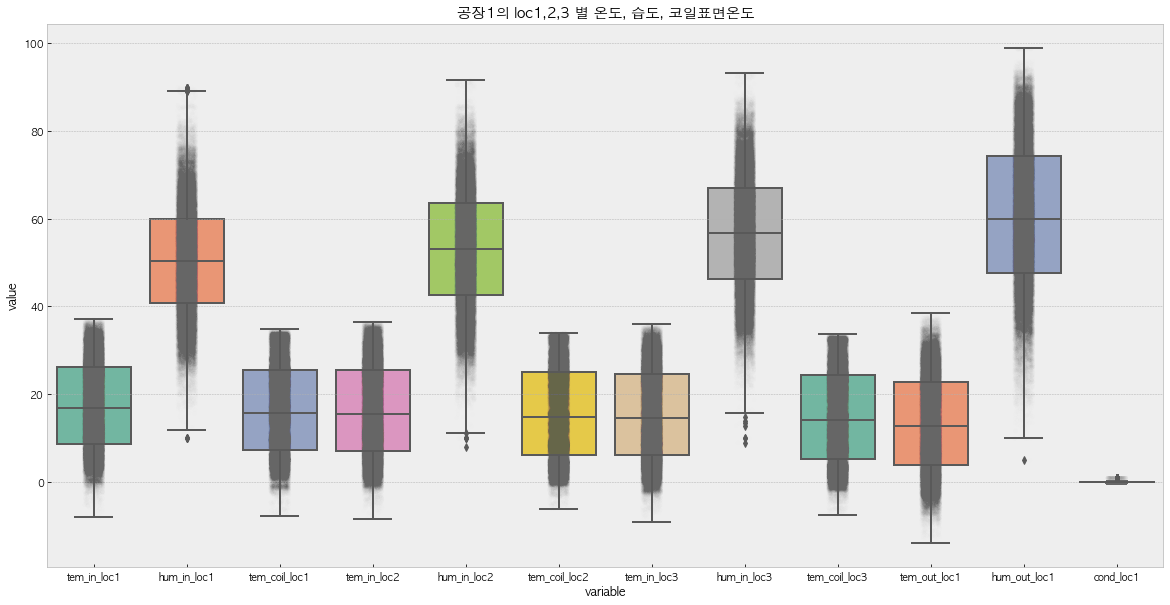

In [204]:
plt.figure(figsize=(20,10))
sns.boxplot(x="variable",y="value", data=plant1_train.iloc[:,1:-9].melt(),palette="Set2")
sns.stripplot(x="variable", y="value", data=plant1_train.iloc[:,1:-9].melt(), jitter=True, color="0.4", alpha=0.005)
plt.title('공장1의 loc1,2,3 별 온도, 습도, 코일표면온도')
plt.show()

Text(0.5, 0.98, '결로 발생여부 별 각 공장위치(loc)에서의 온도, 습도, 코일표면온도')

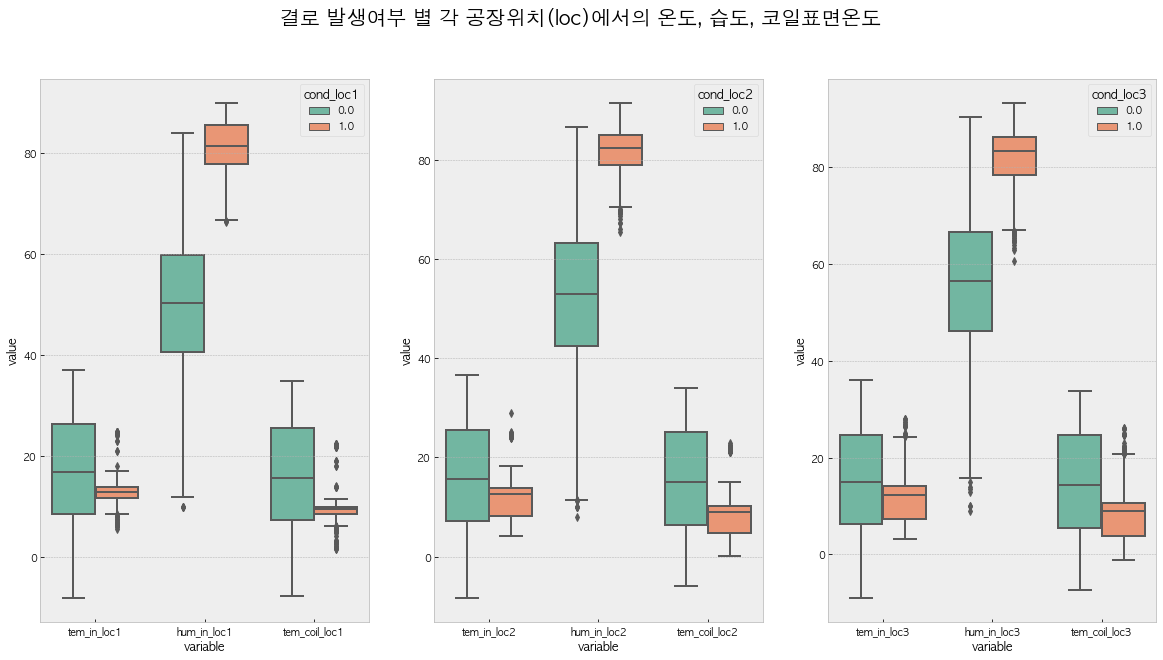

In [234]:
fig,ax=plt.subplots(1,3)
fig.set_size_inches(20,10)
sns.boxplot(x="variable",y="value",hue='cond_loc1',data=pd.melt(plant1_train[['tem_in_loc1','hum_in_loc1','tem_coil_loc1','cond_loc1']], id_vars=['cond_loc1']),palette="Set2",ax=ax[0])
sns.boxplot(x="variable",y="value",hue='cond_loc2',data=pd.melt(plant1_train[['tem_in_loc2','hum_in_loc2','tem_coil_loc2','cond_loc2']], id_vars=['cond_loc2']),palette="Set2",ax=ax[1])
sns.boxplot(x="variable",y="value",hue='cond_loc3',data=pd.melt(plant1_train[['tem_in_loc3','hum_in_loc3','tem_coil_loc3','cond_loc3']], id_vars=['cond_loc3']),palette="Set2",ax=ax[2])
plt.suptitle('결로 발생여부 별 각 공장위치(loc)에서의 온도, 습도, 코일표면온도', fontsize=20)

* 온도, 습도, 코일표면온도 모두 결로 발생한 경우에 이상치가 더 많아보임.

Text(0.5, 0.98, '공장 위치(loc)별 온도, 습도, 코일표면온도')

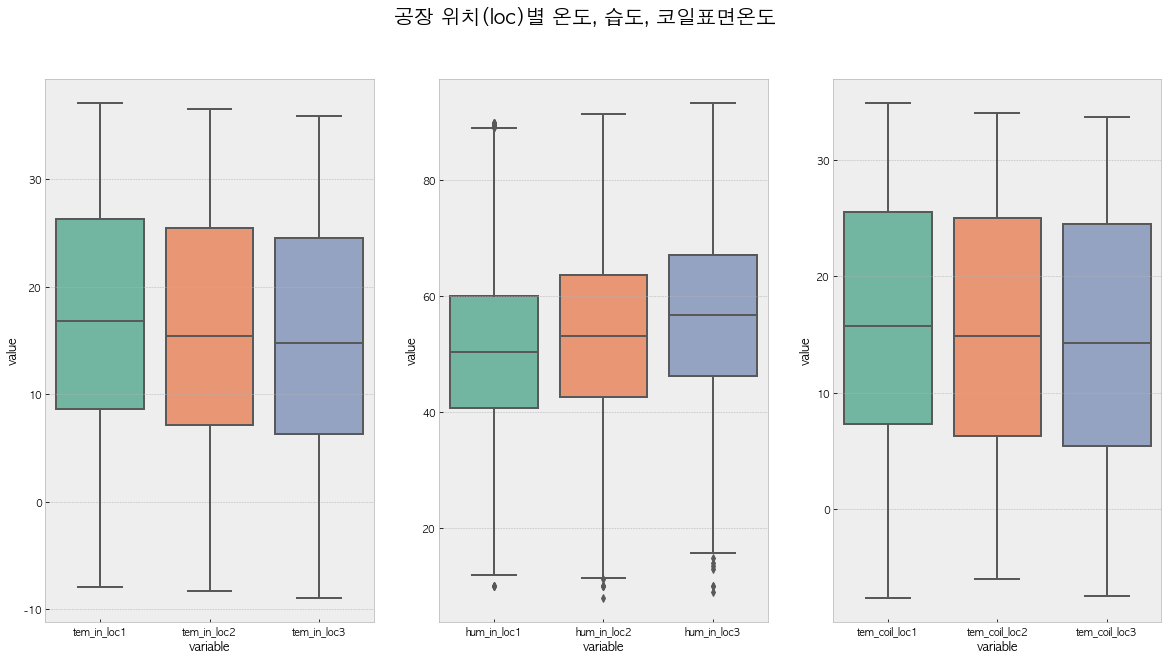

In [227]:
fig,ax=plt.subplots(1,3)
fig.set_size_inches(20,10)
sns.boxplot(x="variable",y="value",data=pd.melt(plant1_train[['tem_in_loc1','tem_in_loc2','tem_in_loc3','cond_loc1','cond_loc2','cond_loc3']], id_vars=['cond_loc1','cond_loc2','cond_loc3']),palette="Set2",ax=ax[0])
sns.boxplot(x="variable",y="value", data=plant1_train[['hum_in_loc1','hum_in_loc2','hum_in_loc3']].melt(),palette="Set2",ax=ax[1])
sns.boxplot(x="variable",y="value", data=plant1_train[['tem_coil_loc1','tem_coil_loc2','tem_coil_loc3']].melt(),palette="Set2",ax=ax[2])
plt.suptitle('공장 위치(loc)별 온도, 습도, 코일표면온도', fontsize=20)

* loc1, loc2, loc3 별 온도,습도,코일표면온도를 봤을 때 loc 별로 온도,습도,코일표면온도 차이를 보임

### 공장 내부온도와 공장 외부온도 차이에 따른 결로
* 정상일때 공장 내부온도와 외부온도 차이는 min=0, 25%=3, 50%=4, 75%=5.6, max=11 
* 결로발생했을때, 공장 내부온도와 외부온도 차이는 min=1.3, 25%=0.64, 50%=1.16, 75%=1.68, max=6.9
    * 따라서, (공장 내부온도 - 공장 외부온도) 가 결로현상을 예측하는 하나의 변수로 작용할 수 있어보임.

In [10]:
plant1_train['tem_diff_loc1']=abs(plant1_train['tem_in_loc1']-plant1_train['tem_out_loc1'])

In [11]:
tem_diff_dcb=pd.concat([ plant1_train.query('cond_loc1==0')['tem_diff_loc1'].describe().to_frame(), plant1_train.query('cond_loc1==1')['tem_diff_loc1'].describe().to_frame()],axis=1)
tem_diff_dcb.columns=['정상','결로']
tem_diff_dcb

,정상,결로
count,57604.000000,275.000000
mean,4.220506,1.330691
std,2.004043,1.112156
min,0.000000,0.030000
25%,2.870000,0.640000
50%,4.310000,1.160000
75%,5.560000,1.680000
max,11.000000,6.900000


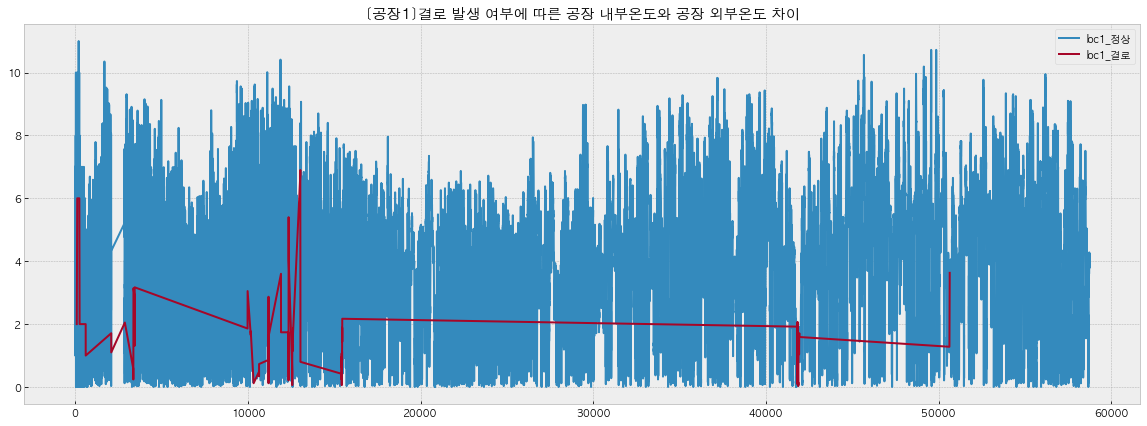

In [272]:
fig,ax=plt.subplots()
fig.set_size_inches(20,7)
plant1_train.query('cond_loc1==0')['tem_diff_loc1'].plot()
plant1_train.query('cond_loc1==1')['tem_diff_loc1'].plot()
plt.title('[공장1]결로 발생 여부에 따른 공장 내부온도와 공장 외부온도 차이')
plt.legend(['loc1_정상','loc1_결로'],loc='upper right')

In [12]:
plant2_train['tem_diff_loc1']=abs(plant2_train['tem_in_loc1']-plant2_train['tem_out_loc1'])

In [281]:
tem_diff_dcb2=pd.concat([ plant2_train.query('cond_loc1==0')['tem_diff_loc1'].describe().to_frame(), plant2_train.query('cond_loc1==1')['tem_diff_loc1'].describe().to_frame()],axis=1)
tem_diff_dcb2.columns=['정상','결로']
tem_diff_dcb2

,정상,결로
count,58141.000000,277.000000
mean,3.229512,1.207112
std,1.889600,1.081307
min,0.000000,0.030000
25%,1.860000,0.520000
50%,3.030000,0.920000
75%,4.430000,1.520000
max,14.070000,6.930000


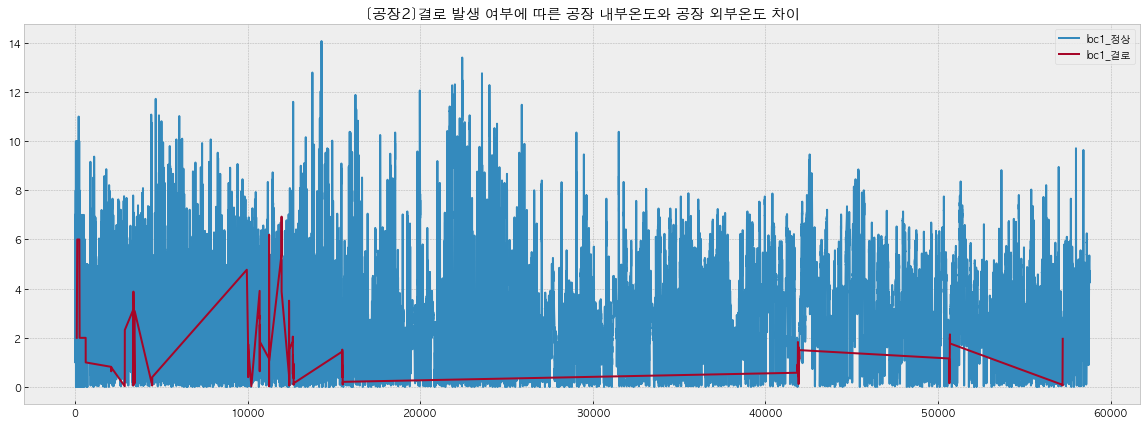

In [273]:
fig,ax=plt.subplots()
fig.set_size_inches(20,7)
plant2_train.query('cond_loc1==0')['tem_diff_loc1'].plot()
plant2_train.query('cond_loc1==1')['tem_diff_loc1'].plot()
plt.title('[공장2]결로 발생 여부에 따른 공장 내부온도와 공장 외부온도 차이')
plt.legend(['loc1_정상','loc1_결로'],loc='upper right')

## 이슬점온도와 결로현상
* 코일표면온도가 실내공기 이슬점보다 낮을 때 결로 생김
    * (이슬점 - 표면온도) > 0

In [13]:
def dew_point_c(t_air_c, rel_humidity):
    """
    celcius로 이슬점 계산 함수. 
    
    *attrs
    t_air_c: Series, float. celcius 온도
    rel_humidity: Series, float. 상대습도 %

    *return: float. 이슬점
    """
    A = 17.27
    B = 237.7
    alpha = ((A * t_air_c) / (B + t_air_c)) + np.log(rel_humidity/100.0)
    
    return (B * alpha) / (A - alpha)

In [14]:
plant_train['dew_in'] = dew_point_c(plant_train['tem_in'], plant_train['hum_in'])
plant_train['dew_out'] = dew_point_c(plant_train['tem_out'], plant_train['hum_out'])

In [15]:
temp_cols = ['tem_in', 'hum_in', 'tem_coil', 'tem_out', 'hum_out','dew_in', 'dew_coil', 'dew_out']

In [15]:
plant_train.head()

,datetime,plant,loc,tem_in,hum_in,tem_coil,tem_out,hum_out,cond,x24h_cond,x48h_cond,dew_in,dew_out
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,0.0,0.0,-4.562263,-3.224066
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,0.0,0.0,-6.806323,-3.224066
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0,-3.310253,-3.224066
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,0.0,0.0,-4.223102,-0.461554
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,0.0,0.0,-4.184595,-0.461554


### 결로현상
결로현상이란 물체의 표면에 물방울이 맺히는 현상입니다. <br>
결로현상은 기온차로 발생하는데요. 유리창이나 창틀의 실내측 표면온도가 실내 공기의 이슬점 이하로 떨어질때 미세한 수증기가 창의 표면에 달라붙는 것입니다. <br>
어느 온도의 공기가 그보다 차가운 벽에 접촉해서 기 온이 내려가면 이 공기의 상대습도는 올라갑니다. <br>
결로현상은 주로 겨울에 많이 발생하는데 실내와 실외의 온도차가 크고 실내에는 수중기를 발산시키는 것이 많기 때문입니다. 

In [16]:
cond_y=plant_train.query('cond==1')   # 결로 발생
cond_n=plant_train.query('cond==0') # 결로 미발생

In [19]:
print('결로현상이 발생한 수의 비율 : {} %'.format(round((cond_y.shape[0]/plant_train.shape[0])*100,2)))

결로현상이 발생한 수의 비율 : 0.57 %


In [15]:
print('결로현상 발생하지 않은 수의 비율: {} % '.format(round((cond_n.shape[0]/plant_train.shape[0])*100,2)))

결로현상 발생하지 않은 수의 비율: 98.79 % 


In [19]:
cond_y

,datetime,plant,loc,tem_in,hum_in,tem_coil,tem_out,hum_out,cond,x24h_cond,x48h_cond,dew_in,dew_out
131,2016-04-06 09:00:00,1,3,13.00,84.00,11.00,11.00,45.00,1.0,0.0,1.0,10.358700,-0.476037
178,2016-04-08 09:00:00,1,2,13.00,80.00,10.00,9.00,75.00,1.0,1.0,0.0,9.629510,4.807381
179,2016-04-08 09:00:00,1,3,12.00,82.00,9.00,9.00,75.00,1.0,1.0,0.0,9.021774,4.807381
182,2016-04-08 12:00:00,1,3,13.00,80.00,10.00,12.00,63.00,1.0,0.0,0.0,9.629510,5.174198
197,2016-04-09 03:00:00,1,3,13.00,77.00,10.00,9.00,80.00,1.0,0.0,0.0,9.061264,5.735506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171669,2019-03-21 02:30:00,2,1,11.68,84.83,10.06,10.43,99.48,1.0,0.0,0.0,9.212235,10.351831
171670,2019-03-21 02:30:00,2,2,12.53,83.91,10.48,10.43,99.48,1.0,0.0,0.0,9.882534,10.351831
171672,2019-03-21 02:40:00,2,1,11.68,84.83,10.18,10.21,99.42,1.0,0.0,0.0,9.212235,10.122943
171675,2019-03-21 02:50:00,2,1,11.59,84.86,10.10,9.94,99.45,1.0,0.0,0.0,9.129254,9.857636


In [146]:
# 코일표면온도가 이슬점온도보다 낮을경우=> 100% 결로현상 발생
plant_train[plant_train.dew_in>plant_train.tem_coil]['cond'].value_counts()

1.0    900
Name: cond, dtype: int64

In [144]:
# 코일표면온도가 이슬점온도보다 높을경우 => 99.7%가 결로현상 미발생, 단 0.32%만 결로현상 발생.
plant_train[plant_train.dew_in<=plant_train.tem_coil]['cond'].value_counts()

0.0    348361
1.0      1105
Name: cond, dtype: int64

In [172]:
# (정상)이슬점 - 표면온도
(plant_train.query('cond==0')['dew_in'] - plant_train.query('cond==0')['tem_coil']).describe()

count    348361.000000
mean         -9.722553
std           3.874164
min         -34.071910
25%         -12.208290
50%          -9.334328
75%          -6.947935
max          -0.928971
dtype: float64

In [173]:
# (결로)이슬점 - 표면온도
(plant_train.query('cond==1')['dew_in'] - plant_train.query('cond==1')['tem_coil']).describe()

count    2005.000000
mean        0.121141
std         0.931459
min        -0.999795
25%        -0.623256
50%        -0.134530
75%         0.592266
max         2.759504
dtype: float64

### feature selection
* [참고] https://subinium.github.io/feature-selection/
* 변수간 상관관계 확인.

In [7]:
# 서산
seosan=pd.read_csv('./data/asos_서산_시간별.csv',index_col=None,parse_dates=['일시'])

In [43]:
# 결측치 50 이하인것 중에서 의미있는 변수 선택하여 상관관계 분석.
seosan.isnull().sum()[seosan.isnull().sum().values <50]

지점            0
지점명           0
일시            0
기온(°C)       39
풍속(m/s)      43
풍향(16방위)     43
습도(%)        41
증기압(hPa)     41
이슬점온도(°C)    41
현지기압(hPa)    41
해면기압(hPa)    41
dtype: int64

In [56]:
seosan_feature=seosan[['기온(°C)','풍속(m/s)','습도(%)','증기압(hPa)','이슬점온도(°C)']].rename(columns={'기온(°C)':'기온','풍속(m/s)':'풍속','습도(%)':'습도','증기압(hPa)':'증기압','이슬점온도(°C)':'이슬점온도'})
seosan_feature

,기온,풍속,습도,증기압,이슬점온도
0,8.8,1.5,41.0,4.6,-3.7
1,9.2,1.2,34.0,4.0,-5.8
2,9.2,1.1,33.0,3.8,-6.2
3,7.5,0.4,40.0,4.2,-5.2
4,4.8,0.6,56.0,4.8,-3.2
...,...,...,...,...,...
35193,9.7,4.0,79.0,9.5,6.2
35194,8.7,1.8,85.0,9.5,6.3
35195,7.7,1.9,89.0,9.3,5.9
35196,6.4,0.8,72.0,6.9,1.7


#### 변수간 상관관계
* 기온과 이슬점온도  = 0.91
* 기온과 증기압=  0.87


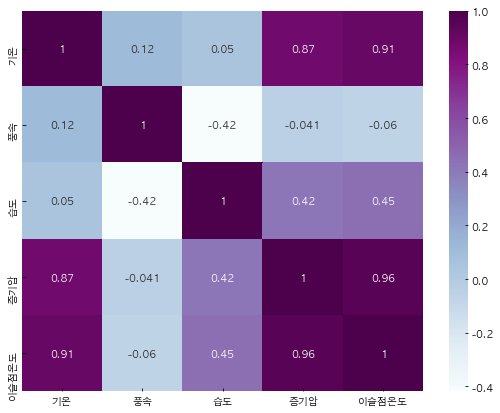

In [61]:
plt.figure(figsize=(9,7))
cor = seosan_feature.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuPu)
plt.show()

In [67]:
cor_target=abs(cor)
cor_target[cor_target>0.5]

,기온,풍속,습도,증기압,이슬점온도
기온,1.000000,NaN,NaN,0.872912,0.910262
풍속,NaN,1.0,NaN,NaN,NaN
습도,NaN,NaN,1.0,NaN,NaN
증기압,0.872912,NaN,NaN,1.000000,0.956149
이슬점온도,0.910262,NaN,NaN,0.956149,1.000000


------------------------------------------------------------------------------------------
## 1) 과거 기상 데이터로 24시간, 48시간 후의 기상 데이터 예측 - 시계열  
(참고) https://tykimos.github.io/warehouse/2018-5-16-ISS_Plant_DeepLearning_Model_in_SNRC_kbk_file.pdf <br>
* 이동평균, 회귀, arimax
* 요약 :
    * 2016-04-01  ~ 2019-03-31 의 3년 날씨 데이터로 2019-04-01 ~ 2020-03-29 (1년) 날씨를 예측하는 것
    * 주어진 날씨데이터는 시간별 데이터고, 예측할 날씨는 30분 단위로 예측해야함. 
        * 입력데이터를 30분단위로 처리필요
    * train = 2016-04-01  ~ 2019-03-31 (3년 데이터로 train하고 이후 1년을 예측)
    * test = 2019-04-01 ~ 2020-03-31 
    
* 승한's idea 
    * 2019-04-01 00:00 의 24시간 후인 2019-04-02 00:00 를 예측한다고 할 때, 2019-03-31 00:00,2019-03-30 00:00,2019-03-29 00:00 처럼 같은 시간대의 데이터만 일별로 가져와서 1시간 이후를 예측 
    * 다만, 2019-04-01 04:30 와같이 30분 데이터를 예측할 때는 날씨데이터는 1시간 간격이므로, 2019-03-31 04:30 의 날씨데이터는 존재하지 않으므로, 2019-03-31 04:00 데이터와 그 이전 2019-03-30 04:30, 2019-03-29 04:30 .. 데이터를 가져오게끔 
        * 선형보간법으로 채우려면 2019-04-02 04:30 데이터가 있어야 하는데 , 예측하려는 날짜 이후의 데이터는 쓸 수 없으므로 04:00 데이터를 가져옴
    * 기간을 얼마나 가져와서 돌릴지는 고민해봐야 함.

In [17]:
# 서산
seosan=pd.read_csv('./data/asos_서산_시간별.csv',index_col=None,parse_dates=['일시'])

In [18]:
seosan.shape

(35198, 37)

In [19]:
#seosan=seosan.set_index('일시')

In [20]:
# 결측치, 결측치비율 확인
missing_values=pd.concat([seosan.isnull().sum(), 
                          round((seosan.isnull().sum()/seosan.isnull().shape[0])*100,2).to_frame().rename(columns={0:'ratio(%)'})], axis=1)
missing_values.columns=['missing_num','ratio(%)']
missing_values

,missing_num,ratio(%)
지점,0,0.00
지점명,0,0.00
일시,0,0.00
기온(°C),39,0.11
기온 QC플래그,12232,34.75
강수량(mm),32166,91.39
강수량 QC플래그,26760,76.03
풍속(m/s),43,0.12
풍속 QC플래그,12601,35.80
풍향(16방위),43,0.12


In [21]:
# 30분단위 추가 전
seosan_hum=seosan[['일시','습도(%)']]
seosan_hum.columns=['일시','습도']
seosan_dew=seosan[['일시','이슬점온도(°C)']]
seosan_dew.columns=['일시','이슬점온도']
seosan_tem=seosan[['일시','기온(°C)']]
seosan_tem.columns=['일시','기온']
#seosan_tem=seosan_tem.iloc[:26246]     # train 데이터 분리.

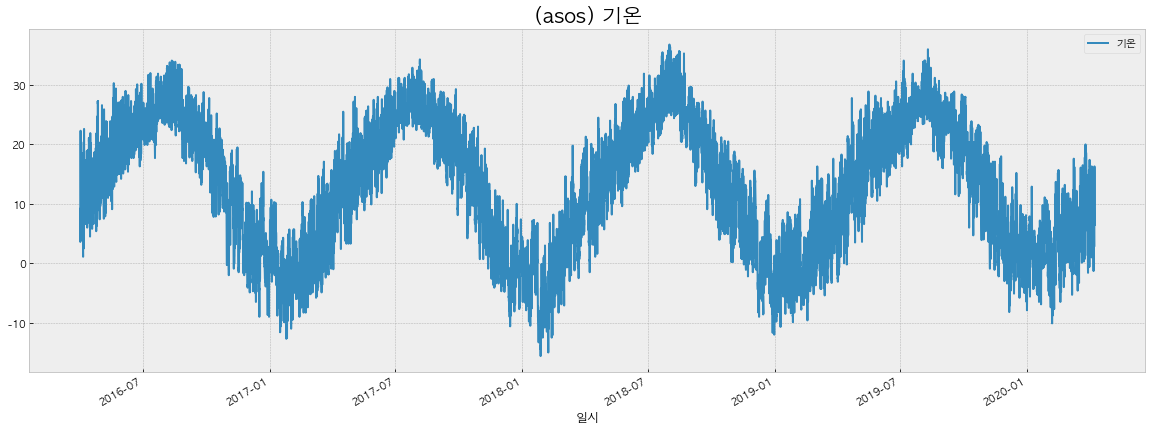

In [206]:
fig,ax=plt.subplots()
fig.set_size_inches(20,7)
seosan_tem.set_index('일시').plot(ax=ax)
plt.legend(loc='upper right')
plt.title('(asos) 기온', fontsize=20)
plt.show()

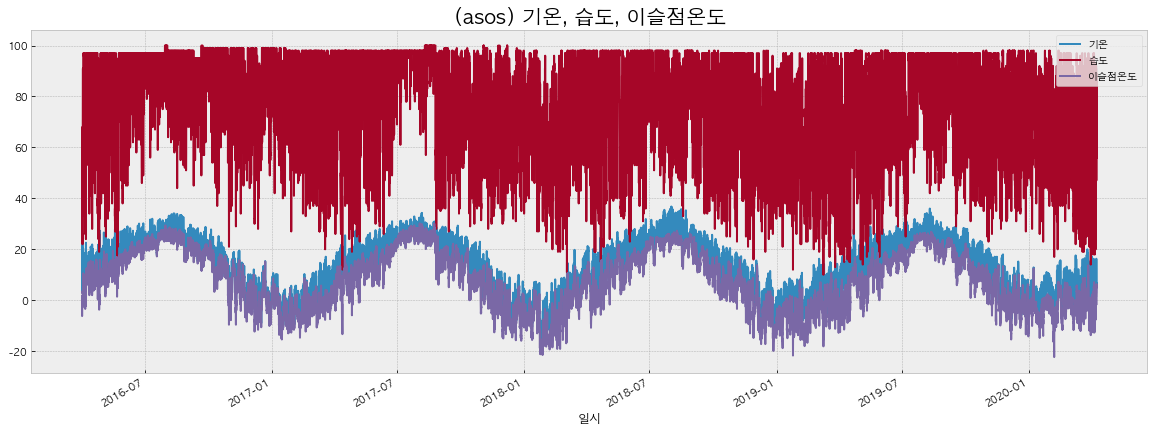

In [208]:
fig,ax=plt.subplots()
fig.set_size_inches(20,7)
seosan_tem.set_index('일시').plot(ax=ax)
seosan_hum.set_index('일시').plot(ax=ax)
seosan_dew.set_index('일시').plot(ax=ax)
plt.legend(loc='upper right')
plt.title('(asos) 기온, 습도, 이슬점온도', fontsize=20)
plt.show()

#### test데이터와 동일하게 30분 단위 데이터 생성
* 기존 날짜기간 : 2016-04-01 00:00:00 ~ 2020-04-07 23:00:00
* 생성한 날짜기간 : 2016-04-01 00:30:00 ~ 2020-04-07 22:30:00

In [22]:
index_30min=pd.date_range('2016-04-01 00:30:00', periods=35231, freq='H')
index_30min=index_30min.to_frame().rename(columns={0:'일시'})
index_30min

,일시
2016-04-01 00:30:00,2016-04-01 00:30:00
2016-04-01 01:30:00,2016-04-01 01:30:00
2016-04-01 02:30:00,2016-04-01 02:30:00
2016-04-01 03:30:00,2016-04-01 03:30:00
2016-04-01 04:30:00,2016-04-01 04:30:00
...,...
2020-04-07 18:30:00,2020-04-07 18:30:00
2020-04-07 19:30:00,2020-04-07 19:30:00
2020-04-07 20:30:00,2020-04-07 20:30:00
2020-04-07 21:30:00,2020-04-07 21:30:00


In [23]:
seosan2=pd.concat([seosan,index_30min],ignore_index=True)
seosan2=seosan2.sort_values('일시').reset_index(drop=True)
seosan2

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,129.0,서산,2016-04-01 00:00:00,8.8,0.0,NaN,NaN,1.5,0.0,50.0,0.0,41.0,0.0,4.6,-3.7,1012.1,0.0,1015.6,0.0,NaN,9.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2000.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,2016-04-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,129.0,서산,2016-04-01 01:00:00,9.2,0.0,NaN,NaN,1.2,0.0,50.0,0.0,34.0,0.0,4.0,-5.8,1011.7,0.0,1015.2,0.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,3.4,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,2016-04-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,129.0,서산,2016-04-01 02:00:00,9.2,0.0,NaN,NaN,1.1,0.0,20.0,0.0,33.0,0.0,3.8,-6.2,1011.3,0.0,1014.8,0.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,3.3,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70424,129.0,서산,2020-04-07 21:00:00,7.7,NaN,NaN,NaN,1.9,NaN,200.0,NaN,89.0,NaN,9.3,5.9,1013.5,NaN,1016.6,NaN,NaN,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1281.0,NaN,NaN,8.3,NaN,11.8,12.0,11.4,11.2
70425,NaN,NaN,2020-04-07 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70426,129.0,서산,2020-04-07 22:00:00,6.4,NaN,NaN,NaN,0.8,NaN,180.0,NaN,72.0,NaN,6.9,1.7,1013.8,NaN,1016.9,NaN,NaN,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1439.0,NaN,NaN,7.0,NaN,11.2,11.6,11.3,11.2
70427,NaN,NaN,2020-04-07 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# 30분단위 추가 전
print('30분단위 추가 전 :',seosan.shape)
print('30분단위 추가 후 :',seosan2.shape)

30분단위 추가 전 : (35198, 37)
30분단위 추가 후 : (70429, 37)


In [24]:
# 30분단위 추가 후  기온, 습도, 이슬점온도 분류
seosan_hum2=seosan2[['일시','습도(%)']]
seosan_hum2.columns=['일시','습도']
seosan_dew2=seosan2[['일시','이슬점온도(°C)']]
seosan_dew2.columns=['일시','이슬점온도']
seosan_tem2=seosan2[['일시','기온(°C)']]
seosan_tem2.columns=['일시','기온']
#seosan_tem=seosan_tem.iloc[:26246]     # train 데이터 분리.

In [25]:
seosan_tem2.head()

,일시,기온
0,2016-04-01 00:00:00,8.8
1,2016-04-01 00:30:00,NaN
2,2016-04-01 01:00:00,9.2
3,2016-04-01 01:30:00,NaN
4,2016-04-01 02:00:00,9.2


### 결측값 보간
1. 시계열데이터의 값에 선형으로 비례하는 방식으로 결측값 보간 
    * (이 방법으로 보간)
2. 시계열 날짜 index를 기준으로 결측값 보간
3. DataFrame 값에 선형으로 비례하는 방식으로 결측값 보간
4. 결측값 보간 개수 제한하기

In [26]:
seosan_tem2=seosan_tem2.interpolate().set_index('일시')
seosan_hum2=seosan_hum2.interpolate().set_index('일시')
seosan_dew2=seosan_dew2.interpolate().set_index('일시')
print('기온 결측치:',seosan_tem2.isnull().sum())
print('습도 결측치:',seosan_hum2.isnull().sum())
print('이슬점온도 결측치:',seosan_dew2.isnull().sum())

기온 결측치: 기온    0
dtype: int64
습도 결측치: 습도    0
dtype: int64
이슬점온도 결측치: 이슬점온도    0
dtype: int64


In [27]:
# 30분단위 추가하고, 선형보간법으로 nan값 채운 결과
seosan_tem2

,기온
일시,
2016-04-01 00:00:00,8.80
2016-04-01 00:30:00,9.00
2016-04-01 01:00:00,9.20
2016-04-01 01:30:00,9.20
2016-04-01 02:00:00,9.20
...,...
2020-04-07 21:00:00,7.70
2020-04-07 21:30:00,7.05
2020-04-07 22:00:00,6.40


----------------------------------------------------------------------------------------------------------------
## SARIMAX, ARIMAX 모형 
* ARMA 시계열 모형에 외부 시계열로 인한 영향을 추가해야 할 경우가 있을 수 있다. 이러한 모형을 ARMAX 모형이라고 하며 다음과 같은 수식을 따른다.
* train,test 데이터분류 방식
    * total = 2016-04-01 ~2020-04-07
    * train = 2016-04-01 ~ 2019-03-31 
    * test = 2019-04-01 ~ 2020-04-07

[SARIMAX 참고]
* https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

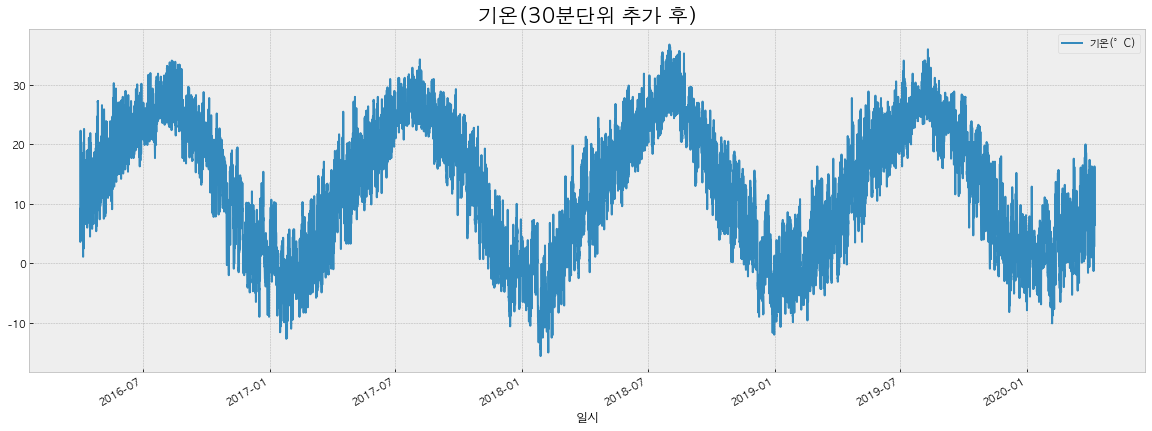

In [528]:
fig,ax=plt.subplots()
fig.set_size_inches(20,7)
seosan_tem2.plot(ax=ax)
plt.legend(loc='upper right')
plt.title('기온(30분단위 추가 후)', fontsize=20)
plt.show()

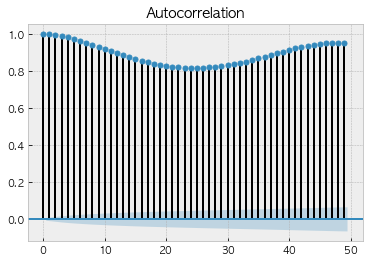

In [530]:
# acf-plot
plot_acf(seosan_tem2) 
plt.show()

<Figure size 432x288 with 0 Axes>

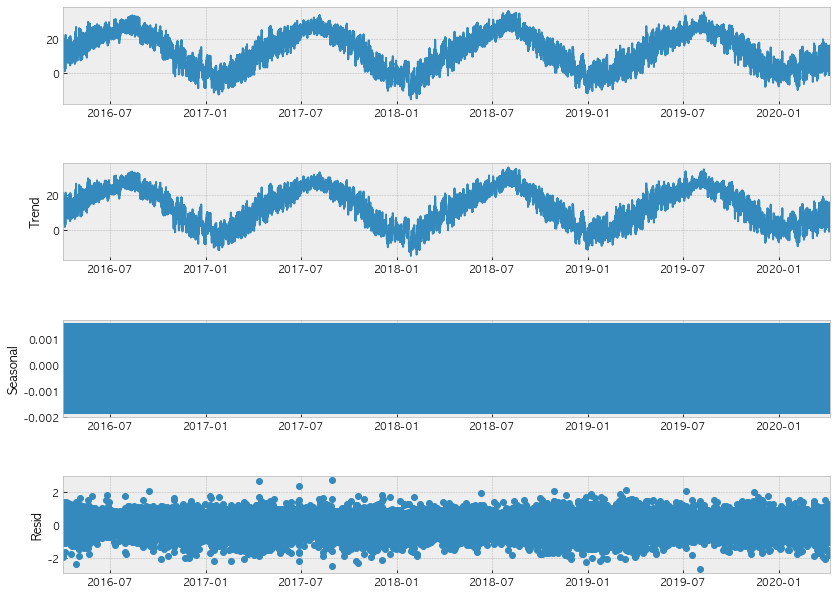

In [531]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
decomposition = seasonal_decompose(seosan_tem2, freq=7) 
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(13,9)
plt.show()

**train, test 데이터 분리**
* train = 2016-04-01 ~ 2019-03-31 
* test = 2019-04-01 ~ 2020-04-07

In [34]:
# train=seosan_tem2.iloc[:26246]  
# test=seosan_tem2.iloc[26246:]  

In [ ]:
# seosan_tem2=seosan2[['일시','기온']]
# seosan_tem2=seosan_tem2.interpolate().set_index('일시')

In [26]:
seosan_tem2[:1000].iloc[:len(seosan_tem2[:1000])-50] 

,기온
일시,
2016-04-01 00:00:00,8.80
2016-04-01 00:30:00,9.00
2016-04-01 01:00:00,9.20
2016-04-01 01:30:00,9.20
2016-04-01 02:00:00,9.20
...,...
2016-04-20 16:30:00,15.25
2016-04-20 17:00:00,14.80
2016-04-20 17:30:00,14.15


In [27]:
seosan_tem2[:1000].iloc[len(seosan_tem2[:1000])-50:]  

,기온
일시,
2016-04-20 19:00:00,12.70
2016-04-20 19:30:00,12.45
2016-04-20 20:00:00,12.20
2016-04-20 20:30:00,12.15
2016-04-20 21:00:00,12.10
2016-04-20 21:30:00,12.15
2016-04-20 22:00:00,12.20
2016-04-20 22:30:00,11.75
2016-04-20 23:00:00,11.30


#### SARIMAX 두가지 결과 확인
1. 전체 데이터에서 train과 test를 나눠서 test부분을 예측하고, 실제 test값과 함께 그려보기
2. 전체 데이터를 훈련시켜서 우리가 모르는 이후의 값을 예측하고, 전체 데이터와 그 이후 예측값을 붙여서 그려보기

In [49]:
from pmdarima import auto_arima

In [118]:
# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(seosan_tem2['기온'][:1000], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=1440.961, BIC=1465.439, Time=7.930 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=6346.004, BIC=6355.796, Time=0.053 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=2772.863, BIC=2792.446, Time=1.181 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=4439.662, BIC=4459.245, Time=2.936 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=6344.415, BIC=6349.311, Time=0.049 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=2219.938, BIC=2239.520, Time=0.424 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=1414.514, BIC=1443.888, Time=3.944 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit ci

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -449.455
Date:                              Mon, 01 Jun 2020   AIC                            912.910
Time:                                      21:06:01   BIC                            947.180
Sample:                                           0   HQIC                           925.943
                                             - 1000                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.019      0.308      -0.000       0.001
ar.L1          1.8844      0.018    105.474      0.000       1.849       1.919
ar.L2         -0.9069      0.017    -52.924      0.000      -0.940      -0.873
ma.L1         -0.0476      0.071     -0.674      0.500      -0.186       0.091
ma.L2         -0.2148      0.027     -7.890      0.000      -0.268      -0.161
ma.S.L12      -0.9984      0.154     -6.477      0.000      -1.300      -0.696
sigma2         0.1360      0.021      6.398      0.000       0.094       0.178
===================================================================================
Ljung-Box (Q):                       56.96   Jarque-Bera (JB):               556.32
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
# 950
train.tail()   

,일시,기온
945,2016-04-20 16:30:00,15.25
946,2016-04-20 17:00:00,14.80
947,2016-04-20 17:30:00,14.15
948,2016-04-20 18:00:00,13.50
949,2016-04-20 18:30:00,13.10


In [158]:
# 50
test.head()

,일시,기온
950,2016-04-20 19:00:00,12.70
951,2016-04-20 19:30:00,12.45
952,2016-04-20 20:00:00,12.20
953,2016-04-20 20:30:00,12.15
954,2016-04-20 21:00:00,12.10


In [30]:
# Split data into train / test sets 
train = seosan_tem2[:1000].iloc[:len(seosan_tem2[:1000])-50] 
test = seosan_tem2[:1000].iloc[len(seosan_tem2[:1000])-50:]  
  
# Fit a SARIMAX(2, 0, 2)x(0, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['기온'][:1000],  
                order = (2, 0, 2),  
                seasonal_order =(0, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                   기온   No. Observations:                  950
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -434.357
Date:                              Tue, 02 Jun 2020   AIC                            880.713
Time:                                      23:20:49   BIC                            909.776
Sample:                                  04-01-2016   HQIC                           891.793
                                       - 04-20-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8878      0.018    105.261      0.000       1.853       1.923
ar.L2         -0.9097      0.017    -52.675      0.000      -0.944      -0.876
ma.L1         -0.0556      0.071     -0.778      0.437      -0.196       0.084
ma.L2         -0.2145      0.028     -7.660      0.000      -0.269      -0.160
ma.S.L12      -0.9972      0.092    -10.787      0.000      -1.178      -0.816
sigma2         0.1391      0.013     10.608      0.000       0.113       0.165
===================================================================================
Ljung-Box (Q):                       59.72   Jarque-Bera (JB):               535.03
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.45
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
len(train) 

950

In [170]:
len(test)

50

In [138]:
len(train) + len(test) - 1

999

In [181]:
len(predictions)

50

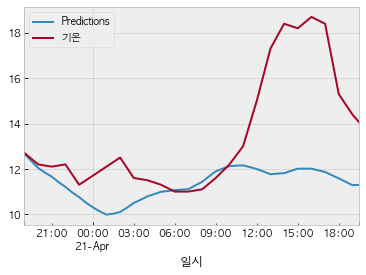

In [32]:
start = len(train)   # 950
end = len(train) + len(test) - 1    # 999
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['기온'].plot(legend = True)
plt.show()

In [33]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["기온"], predictions) 

3.143272235182566

In [173]:
  # Calculate mean squared error 
mean_squared_error(test["기온"], predictions) 

9.880160344469603

In [176]:
len(seosan_tem2['기온'][:1000])

1000

In [177]:
(len(seosan_tem2['기온'][:1000])-1) + 7 * 48

1335

In [190]:
forecast

2016-04-21 20:00:00    13.654346
2016-04-21 20:30:00    13.289466
2016-04-21 21:00:00    12.933036
2016-04-21 21:30:00    12.518414
2016-04-21 22:00:00    12.130792
                         ...    
2016-04-28 17:30:00    11.698857
2016-04-28 18:00:00    11.599682
2016-04-28 18:30:00    11.506613
2016-04-28 19:00:00    11.413785
2016-04-28 19:30:00    11.464031
Freq: 30T, Name: Forecast, Length: 336, dtype: float64

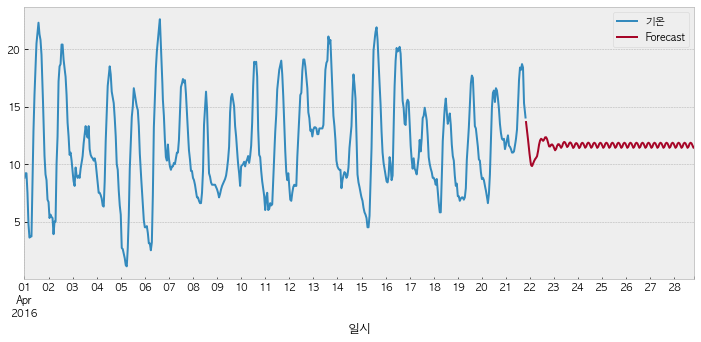

In [192]:
# Train the model on the full dataset 
model = model = SARIMAX(seosan_tem2['기온'][:1000],  
                        order = (2, 0, 2),  
                        seasonal_order =(0, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(seosan_tem2['기온'][:1000]),  
                          end = (len(seosan_tem2['기온'][:1000])-1) + 7 * 48,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
seosan_tem2['기온'][:1000].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)   # 예측한 값

### 같은 시간대의 데이터만 가져와서 2시점 이후를 예측
* 1~500일 train시켜서 501을 예측하고, 2~501일을 train시켜서 502를 예측 ..
    * 예측값이 아닌, 실제값을 사용 
    * ARIMA적용
    
#### 전체 로직 구상
1. 시간대별로 가져와서 24시간후, 48시간후 날씨를 예측
2. 이미 날짜,시간대 별 외부날씨와 내부온도,습도,코일온도 등의 정보가 매칭이 되어있으므로 결로현상은 시간구분없이 예측
3. 회귀로 습도를 예측하고, (예측값-오차) 를 학습해서 ARIMA로 예측 

In [28]:
seosan=pd.read_csv('./data/asos_서산_시간별.csv',index_col=None,parse_dates=['일시'])
seosan_tem=seosan[['일시','기온(°C)']]
seosan_tem.columns=['일시','기온']

In [29]:
# step1. 월별로 같은시간대 데이터만 가져온다 (ex. 4/1 02:00, 4/2 02:00, 4/3 02:00 ....)
# step2. for문으로 하나씩 shifting해서 train-set을 만든다
# step3. SARIMAX모델에 적용.
hour2=seosan_tem[seosan_tem['일시'].apply(lambda x:x.hour)==2].reset_index(drop=True)     # 2시인것만 가져옴.
hour2=hour2.set_index('일시')
hour2=hour2.dropna()
hour2

,기온
일시,
2016-04-01 02:00:00,9.2
2016-04-02 02:00:00,5.6
2016-04-03 02:00:00,8.1
2016-04-04 02:00:00,7.5
2016-04-05 02:00:00,2.6
...,...
2020-04-03 02:00:00,2.0
2020-04-04 02:00:00,6.1
2020-04-05 02:00:00,6.0


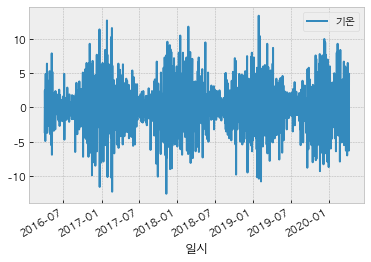

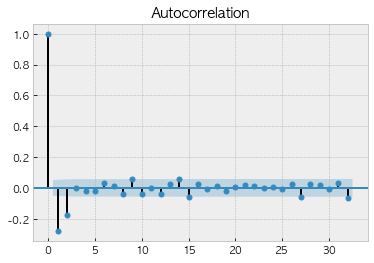

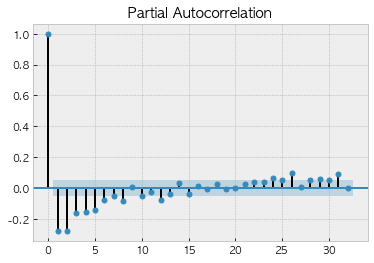

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=hour2.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [61]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(hour2, order=(0,0,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                     기온   No. Observations:                 1464
Model:                     ARMA(0, 1)   Log Likelihood               -4781.482
Method:                       css-mle   S.D. of innovations              6.339
Date:                Wed, 03 Jun 2020   AIC                           9568.964
Time:                        08:52:21   BIC                           9584.831
Sample:                             0   HQIC                          9574.882
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8803      0.294     33.616      0.000       9.304      10.456
ma.L1.기온       0.7745      0.012     62.062      0.000       0.750       0.799
                                    Roots           

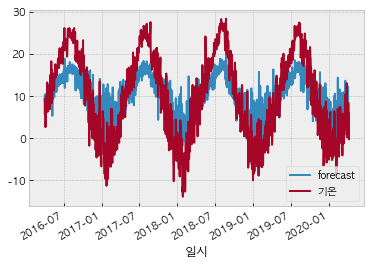

In [137]:
model_fit.plot_predict()
plt.show()

In [141]:
fore = model_fit.forecast(steps=2)
print(fore)

(array([10.80596288,  9.88029815]), array([6.33942699, 8.01841666]), array([[-1.6190857 , 23.23101146],
       [-5.83550971, 25.59610602]]))


------------------------------------------------------------------------
#### 500일 이전시점 train & predict 
* 시간대 4:30 인것만 500일 가져오기
* 2019-04-01 04:30 이전 500일 데이터로 2019-04-02 04:30 과, 2019-04-03 04:30 값 예측

In [76]:
# 30분단위 데이터 추가 & 선형보간법으로 결측치 채운것
seosan_tem2=seosan2[['일시','기온(°C)']]
seosan_tem2.columns=['일시','기온']
seosan_tem2=seosan_tem2.interpolate()
seosan_tem2

,일시,기온
0,2016-04-01 00:00:00,8.80
1,2016-04-01 00:30:00,9.00
2,2016-04-01 01:00:00,9.20
3,2016-04-01 01:30:00,9.20
4,2016-04-01 02:00:00,9.20
...,...,...
70424,2020-04-07 21:00:00,7.70
70425,2020-04-07 21:30:00,7.05
70426,2020-04-07 22:00:00,6.40
70427,2020-04-07 22:30:00,6.50


In [94]:
# 4시반 데이터만 일자별로 가져오기
hour4_30=seosan_tem2[(seosan_tem2['일시'].apply(lambda x:x.hour)==4)]
hour4_30=hour4_30[(hour4_30['일시'].apply(lambda x:x.minute)==30)].reset_index(drop=True)
hour4_30

,일시,기온
0,2016-04-01 04:30:00,4.20
1,2016-04-02 04:30:00,4.60
2,2016-04-03 04:30:00,8.90
3,2016-04-04 04:30:00,7.15
4,2016-04-05 04:30:00,1.50
...,...,...
1463,2020-04-03 04:30:00,1.55
1464,2020-04-04 04:30:00,6.05
1465,2020-04-05 04:30:00,4.10
1466,2020-04-06 04:30:00,-1.30


In [117]:
# 2019-04-01 4:30 포함해서 이전 500일
### 2019-04-01 04:30 이전 500일 데이터로 두시점 이후 예측 (24h, 48h)
day_500=hour4_30[1096-(500):1096].set_index('일시')
day_500

,기온
일시,
2017-11-18 04:30:00,1.30
2017-11-19 04:30:00,-2.05
2017-11-20 04:30:00,0.05
2017-11-21 04:30:00,-3.30
2017-11-22 04:30:00,2.00
...,...
2019-03-28 04:30:00,4.95
2019-03-29 04:30:00,5.75
2019-03-30 04:30:00,4.60


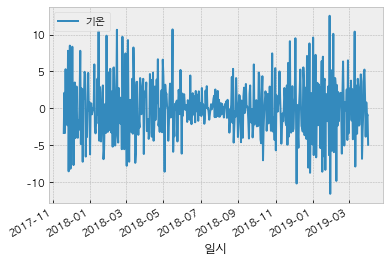

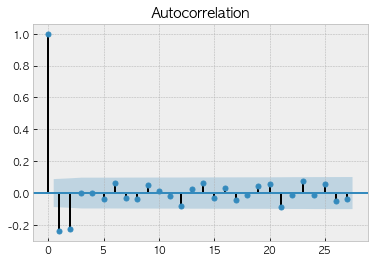

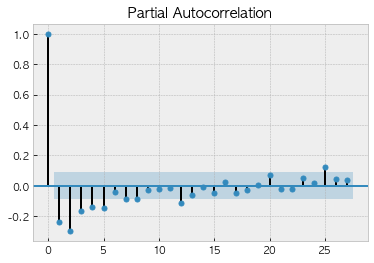

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=day_500.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [136]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(day_500, order=(1,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.기온   No. Observations:                  499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1313.849
Method:                       css-mle   S.D. of innovations              3.365
Date:                Wed, 03 Jun 2020   AIC                           2633.698
Time:                        09:21:32   BIC                           2646.336
Sample:                    11-19-2017   HQIC                          2638.658
                         - 04-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.기온     0.3644      0.055      6.673      0.000       0.257       0.471
ma.L1.D.기온    -0.8400      0.028    -29.881      0.000      -0.895      -0.785
                                    Roots           

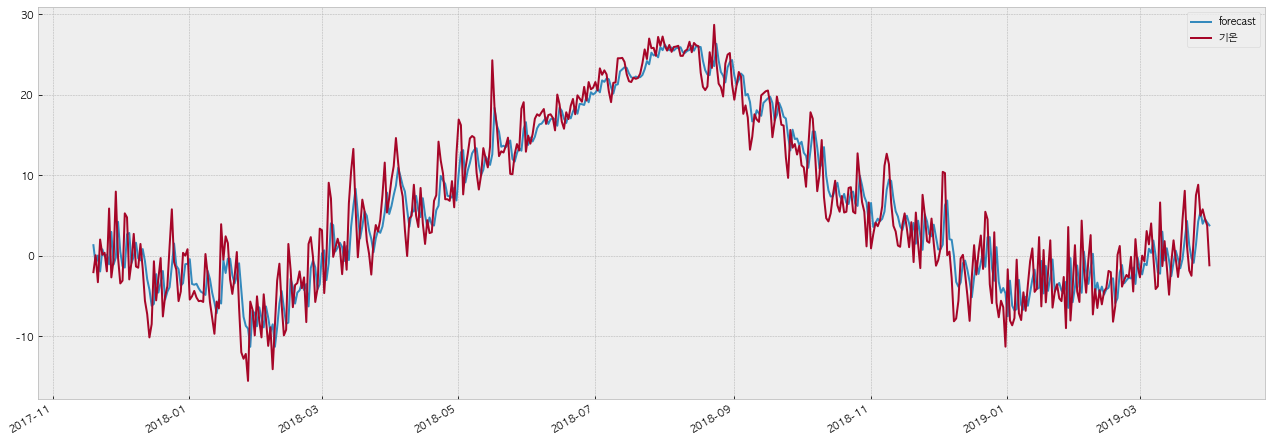

In [153]:
fig,ax=plt.subplots()
fig.set_size_inches(22,8)
fig=model_fit.plot_predict(ax=ax)
plt.show()

In [138]:
# 예측값, stderr, upper bound, lower bound 
fore = model_fit.forecast(steps=2)
print(fore)

(array([1.16102861, 2.02139839]), array([3.36487212, 3.79952665]), array([[-5.43399955,  7.75605677],
       [-5.42553701,  9.46833378]]))


In [126]:
# 2019-04-02 , 2019-04-03 04:30 데이터 예측값과 비교
## 2019-04-02(04:30) ===> -2.45
## 2019-04-03(04:30) ===> -1.30
hour4_30[1096-(500):1098]

,일시,기온
596,2017-11-18 04:30:00,1.30
597,2017-11-19 04:30:00,-2.05
598,2017-11-20 04:30:00,0.05
599,2017-11-21 04:30:00,-3.30
600,2017-11-22 04:30:00,2.00
...,...,...
1093,2019-03-30 04:30:00,4.60
1094,2019-03-31 04:30:00,3.75
1095,2019-04-01 04:30:00,-1.20
1096,2019-04-02 04:30:00,-2.45


In [139]:
model_fit.predict()

2017-11-19 04:30:00    0.000000
2017-11-20 04:30:00    1.011091
2017-11-21 04:30:00   -0.032914
2017-11-22 04:30:00    1.335774
2017-11-23 04:30:00   -1.215431
                         ...   
2019-03-28 04:30:00   -3.358658
2019-03-29 04:30:00   -0.990246
2019-03-30 04:30:00   -1.212225
2019-03-31 04:30:00   -0.471332
2019-04-01 04:30:00    0.008325
Freq: D, Length: 499, dtype: float64

In [30]:
# 4시 30분이라고 하고, 4/1  04:30포함해서 그전 500일까지를 train으로잡고, 24시간후 48시간후를 예측 
## 2년데이터를가지고 테스트할 생각
## 2019-04-01 04:30 을테스트로. 
plant_test

,datetime,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc1,hum_out_loc1,x24h_tma,x24h_cond_loc,x48h_tma,x48h_cond_loc
1,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
2,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
3,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
4,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
5,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3535,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 3:00,NaN,2020-03-31 3:00,NaN
3536,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 5:00,NaN,2020-03-31 5:00,NaN
3537,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 7:00,NaN,2020-03-31 7:00,NaN
3538,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30,NaN,2020-03-31 11:30,NaN
